Bag of Words representation:
[[1 1 2 ... 1 1 2]]
Feature names (words): ['ab' 'abalı' 'acayip' ... 'şurda' 'şânına' 'şöyle']


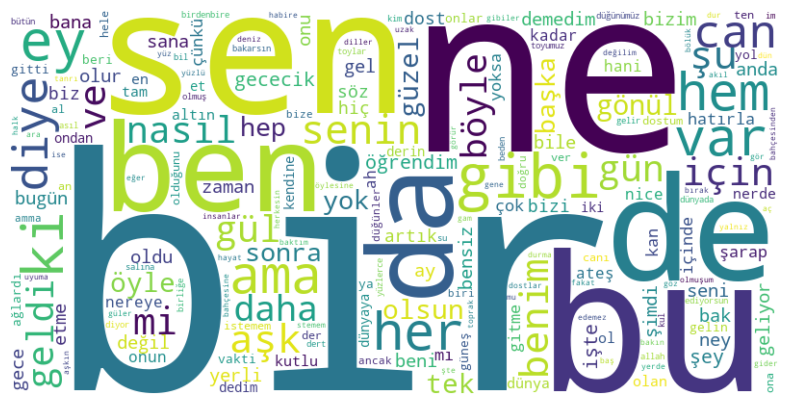

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Read the text from the file
filename = "mevlana.txt"
with open(filename, "r", encoding="utf-8") as file:
    text = file.read()

# Tokenize the text
tokens = word_tokenize(text)

# Convert the list of tokens to a space-separated string
text_str = " ".join(tokens)

# Create a Bag of Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text_str])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Display the Bag of Words representation
print("Bag of Words representation:")
print(X.toarray())
print("Feature names (words):", feature_names)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(zip(feature_names, X.toarray()[0])))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [9]:
import string

def remove_punctuation(text):
    # Noktalama işaretlerini içeren string
    punctuation_chars = string.punctuation

    # Noktalama işaretlerini kaldır
    cleaned_text = ''.join(char for char in text if char not in punctuation_chars)

    return cleaned_text

import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd

# Read the text from the file
filename = "mevlana.txt"
with open(filename, "r", encoding="utf-8") as file:
    text = file.read()

# Noktalama işaretlerini kaldırılmış metin
cleaned_text = remove_punctuation(text)

# Tokenize the text
tokens = word_tokenize(cleaned_text)

# Create bigrams and trigrams
singrams = list(ngrams(tokens, 1))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
fourgrams=list(ngrams(tokens,4))

# Calculate the frequency distribution for bigrams and trigrams
freq_dist_singrams=FreqDist(singrams)
freq_dist_bigrams = FreqDist(bigrams)
freq_dist_trigrams = FreqDist(trigrams)
freq_dist_fourgrams = FreqDist(fourgrams)

# Create Pandas DataFrames for bigrams and trigrams
df_singrams = pd.DataFrame(freq_dist_singrams.items(), columns=['SinGram', 'Frequency'])
df_bigrams = pd.DataFrame(freq_dist_bigrams.items(), columns=['Bigram', 'Frequency'])
df_trigrams = pd.DataFrame(freq_dist_trigrams.items(), columns=['Trigram', 'Frequency'])
df_fourgrams = pd.DataFrame(freq_dist_fourgrams.items(), columns=['Fourgram', 'Frequency'])

# Display the top 10 bigrams and trigrams

print("Top 10 Singrams:")
print(df_singrams.nlargest(10, 'Frequency'))

print("Top 10 Bigrams:")
print(df_bigrams.nlargest(10, 'Frequency'))

print("\nTop 10 Trigrams:")
print(df_trigrams.nlargest(10, 'Frequency'))

print("\nTop 10 FourGrams:")
print(df_fourgrams.nlargest(10, 'Frequency'))


Top 10 Singrams:
     SinGram  Frequency
7     (bir,)        323
15     (ne,)        125
230    (de,)        102
59     (da,)         90
130    (bu,)         86
169  (gibi,)         81
25      (o,)         71
65    (sen,)         68
1      (ki,)         65
43    (var,)         54
Top 10 Bigrams:
                  Bigram  Frequency
97            (ne, diye)         22
160        (demedim, mi)         17
953       (bir, gececik)         16
2842          (bir, tek)         15
2830          (Ne, diye)         13
4849      (yerli, yerli)         12
9           (başka, bir)         11
745           (bir, şey)         11
945       (Bir, gececik)         10
1805  (Toylar, düğünler)         10

Top 10 Trigrams:
                          Trigram  Frequency
1919      (Toylar, düğünler, tam)         10
1920       (düğünler, tam, bizim)         10
1921           (tam, bizim, için)         10
1922       (bizim, için, toyumuz)         10
1923   (için, toyumuz, düğünümüz)         10
1924  (toyumuz, düğ